# Example of Loading and pre-processing data for causality project

#### Using Iris for NetCDF data load and processing; Using xclim (and xarray) for calculating the number of dry days (NDD) and maximum number of consecutive dry days (MCDD)

### __Calculate boreal summer dry days (JJA) for Borneo DROUGHT__

#### Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os

import iris

import iris.quickplot as qplt
import iris.coord_categorisation as coord_cat

import pandas as pd

import xarray as xr 

import xclim

#### Set data path

In [2]:
DATA_PATH = '/chirps/'

#### Load CHIRPS daily precipitation data into an Iris cube

In [4]:
precip_path = os.path.join(DATA_PATH, 'chirps.nc')
print (precip_path)
precip = iris.load_cube(precip_path, 'Climate Hazards group InfraRed Precipitation with Stations')
precip.coord('latitude').guess_bounds()
precip.coord('longitude').guess_bounds()

D:/UoE/Projects/Thesis_Formulation_Report/Script/from_Panzure/chirps/chirps.nc


In [33]:
print(precip)

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 14579; latitude: 400; longitude: 1440)
     Dimension coordinates:
          time                                                             x                -               -
          latitude                                                         -                x               -
          longitude                                                        -                -               x
     Attributes:
          Conventions: CF-1.6
          acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development...
          comments:  time variable denotes the first day of the given day.
          creator_email: pete@geog.ucsb.edu
          creator_name: Pete Peterson
          date_created: 2015-10-07
          documentation: http://pubs.usgs.gov/ds/832/
          faq: http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
          ftp_url: ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/prod

#### Extract Borneo region (as specified by https://daac.ornl.gov/CMS/guides/CMS_LiDAR_Indonesia.html)

In [4]:
# Create a constraint for the latitude and Longitude extents (since the machine is crashing when trying to aggregate by clim season and season year for the whole dataset, let's try to do this first)

s_Borneo_lat = iris.Constraint(latitude=lambda v: v > -3.259 and v <= 3.211 )
s_Borneo_lon = iris.Constraint(longitude=lambda v: v > 109.565 and v <= 117.987 )

s_Borneo_precip =  precip.extract(s_Borneo_lat & s_Borneo_lon) 

In [5]:
print (s_Borneo_precip)

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 14579; latitude: 26; longitude: 33)
    Dimension coordinates:
        time                                                               x                -              -
        latitude                                                           -                x              -
        longitude                                                          -                -              x
    Attributes:
        Conventions                                                   'CF-1.6'
        acknowledgements                                              'The Climate Hazards Group InfraRed Precipitation with Stations development...
        comments                                                      ' time variable denotes the first day of the given day.'
        creator_email                                                 'pete@geog.ucsb.edu'
        creator_name                                                  '

#### Plot some data to check

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 14579; latitude: 26; longitude: 33)
    Dimension coordinates:
        time                                                               x                -              -
        latitude                                                           -                x              -
        longitude                                                          -                -              x
    Attributes:
        Conventions                                                   'CF-1.6'
        acknowledgements                                              'The Climate Hazards Group InfraRed Precipitation with Stations development...
        comments                                                      ' time variable denotes the first day of the given day.'
        creator_email                                                 'pete@geog.ucsb.edu'
        creator_name                                                  '

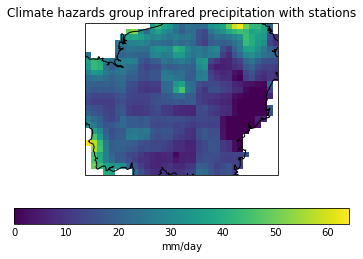

In [6]:
print(s_Borneo_precip)
qplt.pcolormesh(s_Borneo_precip[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

In [37]:
iris.save (s_Borneo_precip, 'Borneo_precip_chirps_daily.nc')

#### Use xclim package to calculate drought indicators

In [3]:
s_Borneo = xr.open_mfdataset('Borneo_precip_chirps_daily.nc')

In [4]:
s_Borneo

<xarray.Dataset>
Dimensions:         (time: 14579, latitude: 26, longitude: 33, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-11-30
  * latitude        (latitude) float32 -3.125 -2.875 -2.625 ... 2.875 3.125
  * longitude       (longitude) float32 109.9 110.1 110.4 ... 117.4 117.6 117.9
Dimensions without coordinates: bnds
Data variables:
    precip          (time, latitude, longitude) float32 dask.array<chunksize=(14579, 26, 33), meta=np.ndarray>
    latitude_bnds   (latitude, bnds) float32 dask.array<chunksize=(26, 2), meta=np.ndarray>
    longitude_bnds  (longitude, bnds) float32 dask.array<chunksize=(33, 2), meta=np.ndarray>
Attributes: (12/21)
    acknowledgements:       The Climate Hazards Group InfraRed Precipitation ...
    comments:                time variable denotes the first day of the given...
    creator_email:          pete@geog.ucsb.edu
    creator_name:           Pete Peterson
    date_created:           2015-10-07
    documentation:          http://pubs.usgs.gov/ds/832/
    ...                     ...
    reference:              Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedr...
    time_step:              day
    title:                  CHIRPS Version 2.0
    version:                Version 2.0
    website:                http://chg.geog.ucsb.edu/data/chirps/index.html
    Conventions:            CF-1.7

In [4]:
s_Borneo.precip

<xarray.DataArray 'precip' (time: 14579, latitude: 26, longitude: 33)>
dask.array<open_dataset-ee6756bb2cf6c4cbc7f8e4fe76634be0precip, shape=(14579, 26, 33), dtype=float32, chunksize=(14579, 26, 33), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-11-30
  * latitude   (latitude) float32 -3.125 -2.875 -2.625 ... 2.625 2.875 3.125
  * longitude  (longitude) float32 109.9 110.1 110.4 110.6 ... 117.4 117.6 117.9
Attributes:
    long_name:  Climate Hazards group InfraRed Precipitation with Stations
    units:      mm/day

In [5]:
# Select JJA time period (with other periods masked as nan)
s_Borneo_jja = xclim.core.calendar.select_time (s_Borneo.precip, season = 'JJA')

In [5]:
print (s_Borneo_jja)

<xarray.DataArray 'precip' (time: 14579, latitude: 26, longitude: 33)>
dask.array<where, shape=(14579, 26, 33), dtype=float32, chunksize=(14579, 26, 33), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-11-30
  * latitude   (latitude) float32 -3.125 -2.875 -2.625 ... 2.625 2.875 3.125
  * longitude  (longitude) float32 109.9 110.1 110.4 110.6 ... 117.4 117.6 117.9
Attributes:
    long_name:  Climate Hazards group InfraRed Precipitation with Stations
    units:      mm/day


In [6]:
# Replace the masked nan of other season with 1 (so they are not misinterpreted as dry days)
s_Borneo_jja = s_Borneo_jja.fillna(1)

In [17]:
# Number of dry days
dry_days = xclim.indicators.atmos.dry_days(pr = s_Borneo_jja, thresh = '1 mm/day')

# Maximum number of consecutive dry days
max_dry_days = xclim.indicators.atmos.maximum_consecutive_dry_days(pr = s_Borneo_jja, thresh = '1 mm/day')

C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\xclim\core\cfchecks.py:39: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\xclim\core\cfchecks.py:43: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\xclim\core\cfchecks.py:39: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\xclim\core\cfchecks.py:43: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


In [18]:
dry_days.to_netcdf ('dry_days_1mm.nc')
max_dry_days.to_netcdf ('consec_dry_days_1mm.nc')

C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\dask\array\reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


#### Load the drought indicators with Iris, do some plotting and construct time series

In [3]:
# Load number of dry days
dry_days_cube = iris.load_cube ('dry_days_1mm.nc', 'Number of dry days (precip < 1 mm/day)')
print (dry_days_cube)
dry_days_cube.coord('latitude').guess_bounds()
dry_days_cube.coord('longitude').guess_bounds()

Number of dry days (precip < 1 mm/day) / (days) (time: 40; latitude: 26; longitude: 33)
    Dimension coordinates:
        time                                         x             -              -
        latitude                                     -             x              -
        longitude                                    -             -              x
    Cell methods:
        sum over days                           time
    Attributes:
        description                             Annual number of days with daily precipitation under 1 mm/day.
        history                                 [2023-08-18 16:33:44] dry_days: DRY_DAYS(pr=precip, thresh='1 mm/day',...
        invalid_standard_name                   number_of_days_with_lwe_thickness_of_precipitation_amount_below_thresh...


C:\Users\user\Anaconda3\lib\site-packages\iris\fileformats\cf.py:372: UserWarning: Missing CF-netCDF boundary variable 'latitude_bnds', referenced by netCDF variable 'latitude'
  warnings.warn(message % (name, nc_var_name))
C:\Users\user\Anaconda3\lib\site-packages\iris\fileformats\cf.py:372: UserWarning: Missing CF-netCDF boundary variable 'longitude_bnds', referenced by netCDF variable 'longitude'
  warnings.warn(message % (name, nc_var_name))


In [25]:
# Up till 2014
coord_cat.add_year(dry_days_cube, 'time', name='year')

year_constraint = iris.Constraint(year=lambda v: v > 1980 and v <= 2014 )
dry_days_cube = dry_days_cube.extract(year_constraint)

In [26]:
# Calculate climatological mean
dry_days_ltm = dry_days_cube.collapsed('time',
                                iris.analysis.MEAN)
print (dry_days_ltm)

Number of dry days (precip < 1 mm/day) / (days) (latitude: 26; longitude: 33)
    Dimension coordinates:
        latitude                                         x              -
        longitude                                        -              x
    Scalar coordinates:
        time                                    1997-07-02 00:00:00, bound=(1981-01-01 00:00:00, 2014-01-01 00:00:00)
        year                                    1997, bound=(1981, 2014)
    Cell methods:
        sum over days                           time
        mean                                    time
    Attributes:
        description                             'Annual number of days with daily precipitation under 1 mm/day.'
        history                                 "[2023-08-18 16:33:44] dry_days: DRY_DAYS(pr=precip, thresh='1 mm/day',...
        invalid_standard_name                   'number_of_days_with_lwe_thickness_of_precipitation_amount_below_thres...


C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\iris\coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\iris\coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


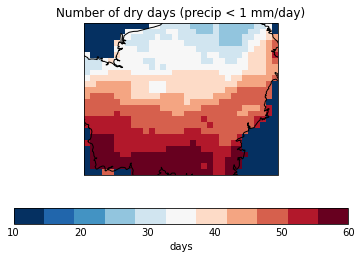

In [20]:
import matplotlib.cm as mpl_cm
qplt.pcolormesh(dry_days_ltm, cmap=mpl_cm.get_cmap('brewer_RdBu_11'), vmin=10,vmax=60) # plot the drought indicator in the second time step
plt.gca().coastlines()

In [27]:
grid_area_weights = iris.analysis.cartography.area_weights(dry_days_ltm)
# Perform the area-weighted mean using the computed grid-box areas.
dry_days_ltm_mean = dry_days_ltm.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)
print (dry_days_ltm_mean.data)

38.403945393825836


C:\Users\user\Anaconda3\envs\xclim_env\lib\site-packages\iris\analysis\cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


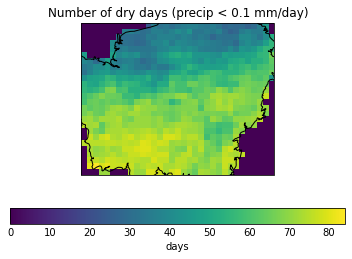

In [92]:
qplt.pcolormesh(dry_days_cube[1]) # plot the drought indicator in the second time step
plt.gca().coastlines()

In [ ]:
grid_area_weights = iris.analysis.cartography.area_weights(dry_days_cube)
# Perform the area-weighted mean using the computed grid-box areas.
dry_days_mean = dry_days_cube.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)

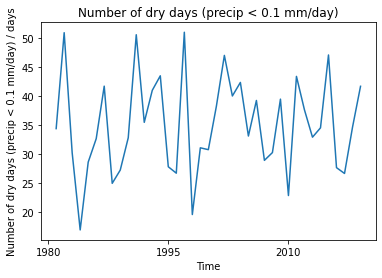

In [96]:
qplt.plot(dry_days_mean)

In [99]:
iris.save (dry_days_mean, 'dry_days_mean.nc')

In [7]:
# Load maximum number of consecutive dry days
max_dry_days_cube = iris.load_cube ('consec_dry_days_1mm.nc', 'Maximum consecutive dry days (precip < 1 mm/day)')
print (max_dry_days_cube)
max_dry_days_cube.coord('latitude').guess_bounds()
max_dry_days_cube.coord('longitude').guess_bounds()

Maximum consecutive dry days (precip < 1 mm/day) / (days) (time: 40; latitude: 26; longitude: 33)
    Dimension coordinates:
        time                                                   x             -              -
        latitude                                               -             x              -
        longitude                                              -             -              x
    Cell methods:
        sum over days                                     time
    Attributes:
        description                                       Annual maximum number of consecutive days with daily precipitation below...
        history                                           [2023-08-18 16:33:47] cdd: CDD(pr=precip, thresh='1 mm/day', freq='YS')...
        invalid_standard_name                             number_of_days_with_lwe_thickness_of_precipitation_amount_below_thresh...


In [ ]:
# Up till 2014
coord_cat.add_year(max_dry_days_cube, 'time', name='year')

year_constraint = iris.Constraint(year=lambda v: v > 1980 and v <= 2014 )
max_dry_days_cube = max_dry_days_cube.extract(year_constraint)

In [10]:
# Calculate climatological mean
max_dry_days_ltm = max_dry_days_cube.collapsed('time',
                                iris.analysis.MEAN)
print (max_dry_days_ltm)

Maximum consecutive dry days (precip < 1 mm/day) / (days) (latitude: 26; longitude: 33)
    Dimension coordinates:
        latitude                                                   x              -
        longitude                                                  -              x
    Scalar coordinates:
        time                                              1994-01-01 00:00:00, bound=(1981-01-01 00:00:00, 2007-01-01 00:00:00)
        year                                              1994, bound=(1981, 2007)
    Cell methods:
        sum over days                                     time
        mean                                              time
    Attributes:
        description                                       Annual maximum number of consecutive days with daily precipitation below...
        history                                           [2023-08-18 16:33:47] cdd: CDD(pr=precip, thresh='1 mm/day', freq='YS')...
        invalid_standard_name                          

C:\Users\user\Anaconda3\lib\site-packages\iris\coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
C:\Users\user\Anaconda3\lib\site-packages\iris\coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


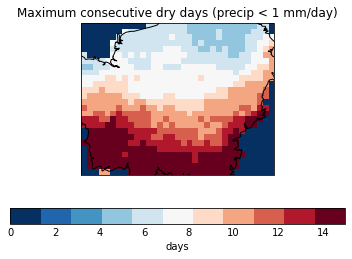

In [19]:
qplt.pcolormesh(max_dry_days_ltm, cmap=mpl_cm.get_cmap('brewer_RdBu_11'), vmin=0,vmax=15) # plot the drought indicator in the second time step
plt.gca().coastlines()

In [11]:
# Perform the area-weighted mean using the computed grid-box areas.
max_dry_days_mean = max_dry_days_ltm.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN)
print (max_dry_days_mean.data)

8.724898558231892


C:\Users\user\Anaconda3\lib\site-packages\iris\cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


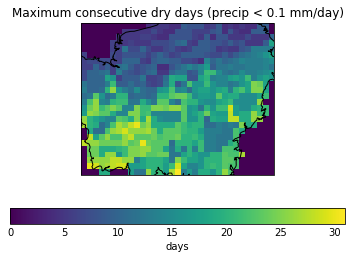

In [10]:
qplt.pcolormesh(max_dry_days_cube[1]) # plot the drought indicator in the second time step
plt.gca().coastlines()

In [12]:
grid_area_weights = iris.analysis.cartography.area_weights(dry_days_cube)

# Perform the area-weighted mean using the computed grid-box areas.
max_dry_days_mean = max_dry_days_cube.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)

C:\Users\user\Anaconda3\lib\site-packages\iris\analysis\cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


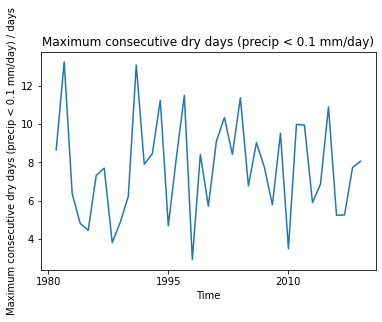

In [19]:
qplt.plot(max_dry_days_mean)

In [16]:
iris.save (max_dry_days_mean, 'consec_dry_days_mean.nc')